Metrics
MSE: 0.6350920483456105
variance_score: 0.430862307382029
max_error_score: 4.241058399807116
r2_value: 0.42316917862223347


Plots:


Text(0.5, 1.0, 'plot of the difference between the actual and predicted values')

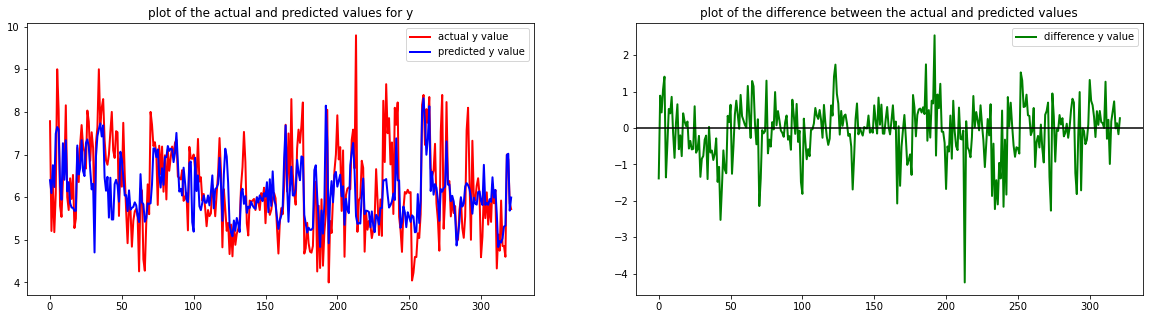

In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd


# load the data
train_data = pd.read_csv(r'C:\Users\s159132\PycharmProjects\Computational_Biology_Bachelor_End_Project\CHEMBL239_dataset_train.csv')
test_data = pd.read_csv(r'C:\Users\s159132\PycharmProjects\Computational_Biology_Bachelor_End_Project\CHEMBL239_dataset_test.csv')

#get x and y values
y_train = train_data.loc[:, 'exp_mean']
y_test = test_data.loc[:, 'exp_mean']
X_train = train_data.loc[:, 'Bit 1' : 'Bit 1024']
X_test = test_data.loc[:, 'Bit 1' : 'Bit 1024']

# Set the parameters to check with GridSearch
param = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

#GridSearch on SVR
svr_model = GridSearchCV(SVR(), param).fit(X_train, y_train)

#store the best kernel parameter
best_param = svr_model.best_params_['kernel']

#Make SVR with best kernel parameter
best_svr_model = SVR(kernel = best_param).fit(X_train, y_train)

#make prediction
y_pred_svr = best_svr_model.predict(X_test)

list_y_pred = []
list_y_actual = []
list_y_diff = []

for item in y_pred_svr:
    list_y_pred.append(item)

for item in y_test:
    list_y_actual.append(item)

for index in range(0, len(y_test)):
    list_y_diff.append(list_y_pred[index] - list_y_actual[index])

    
#print metrics for SVR
print("Metrics")
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print('variance_score:', explained_variance_score(y_test, y_pred_svr))
print('max_error_score:', max_error(y_test, y_pred_svr))
print('r2_value:', r2_score(y_test, y_pred_svr))

print('\n')
print('Plots:')
#make a plot
fig, axes = plt.subplots(1, 2,  figsize=(20, 5))
axes[0].plot(list_y_actual, lw=2, color="red", label="actual y value")
axes[0].plot(list_y_pred, lw=2, color="blue", label="predicted y value")
axes[0].legend()
axes[0].set_title('plot of the actual and predicted values for y')

axes[1].plot(list_y_diff, lw=2, color="green", label="difference y value")
axes[1].axhline(y=0, color='black')
axes[1].legend()
axes[1].set_title('plot of the difference between the actual and predicted values')